<a href="https://colab.research.google.com/github/ananya-ayasi/IBM-ISL-GTSP-team-9/blob/main/WebApp_Wildfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook covers the creation of a web application to detect fire in uploaded images.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install streamlit -q

A Python script has to be written separately in order to host it as a web application.

In [23]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st
import PIL


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/drive/MyDrive/IBM/classifier.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Wildfire Detection using UAV Imagery
         """
         )

file = st.file_uploader("Please upload an image", 
                        type=["jpg", "png"])

import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)

def predict(img_path, model):
    size = (64,64)    
    image = ImageOps.fit(img_path, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
    img_reshape = img[np.newaxis,...]

    result = model.predict(img_reshape)
    
    if result[0][0] == 1:
        prediction = 'notfire'
        return False
    else:
        prediction = 'fire'
        return True


if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = predict(image, model)
    #score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    #st.write(score)
    if predictions==True:
      st.write("""
         ## Fire Detected
         """
         )
      
    else:
      st.write("""
         ## Fire Not Detected
         """
         )
      
    #print(text)
    #print(text.format(class_names[np.argmax(score)], 100 * np.max(score))

Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

2022-05-05 06:37:01.723 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.549s
your url is: https://thin-beers-stand-34-75-13-212.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.75.13.212:8501

2022-05-05 06:37:57.534635: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


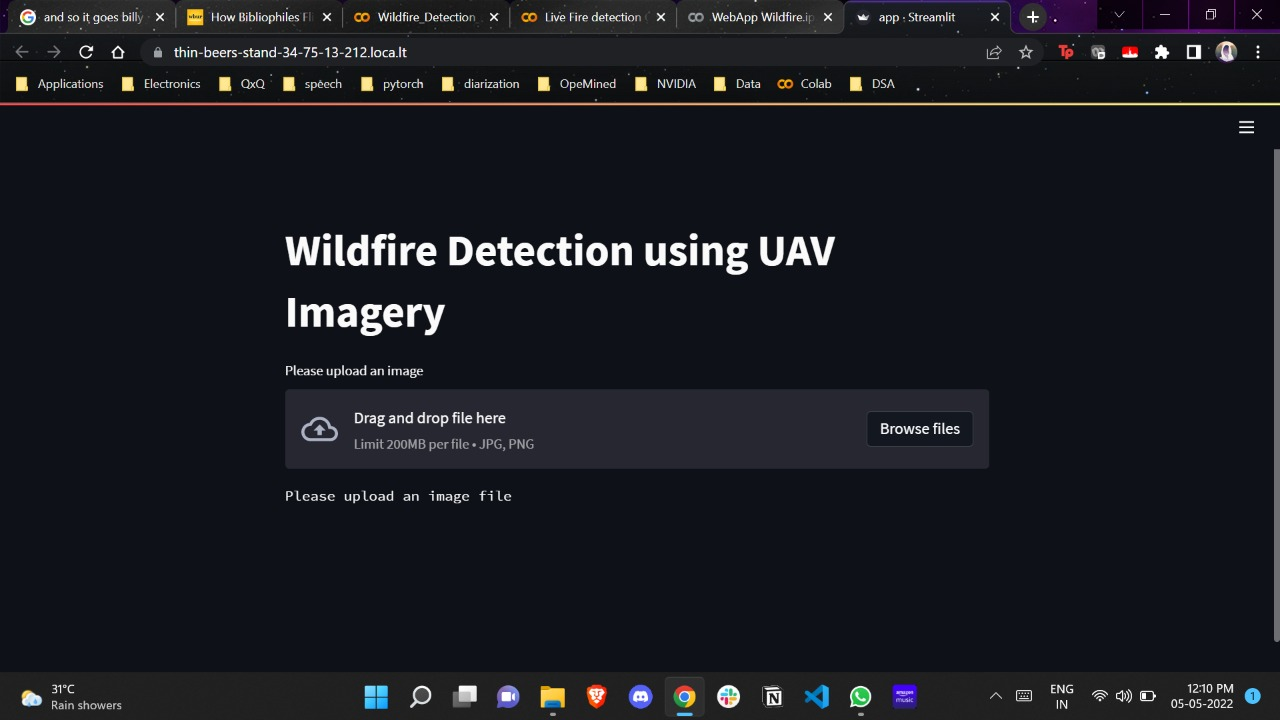

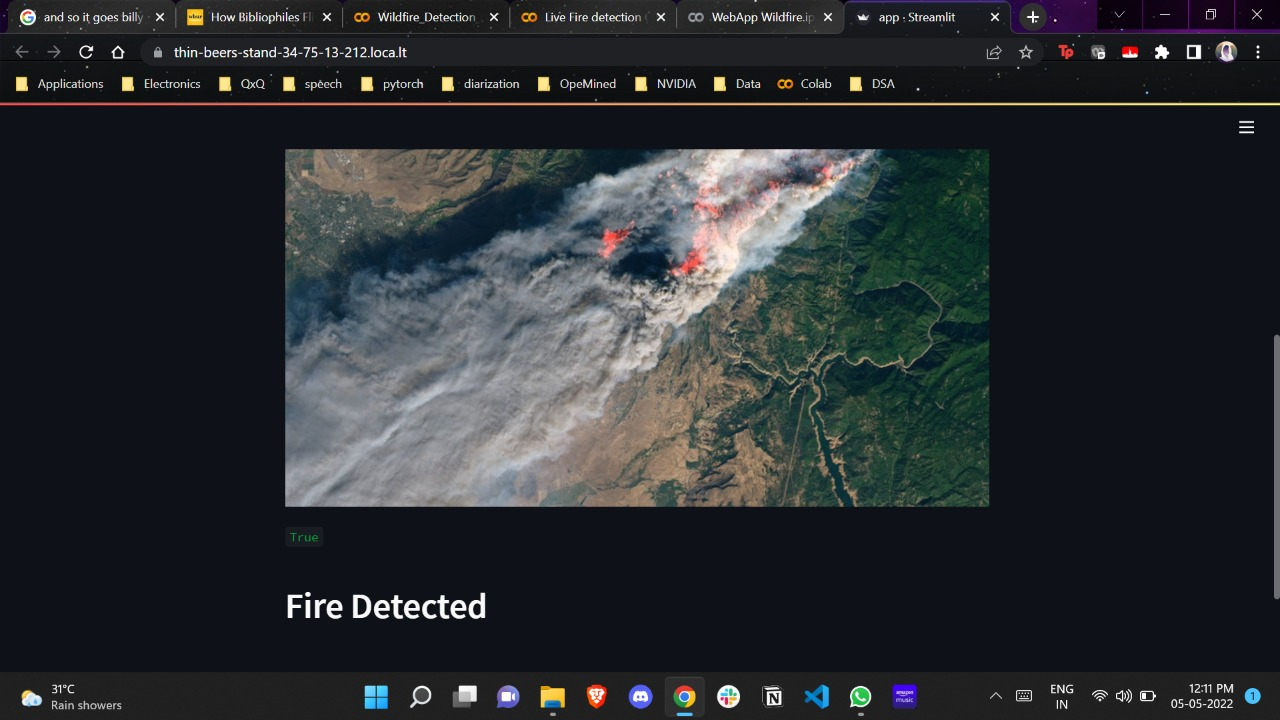

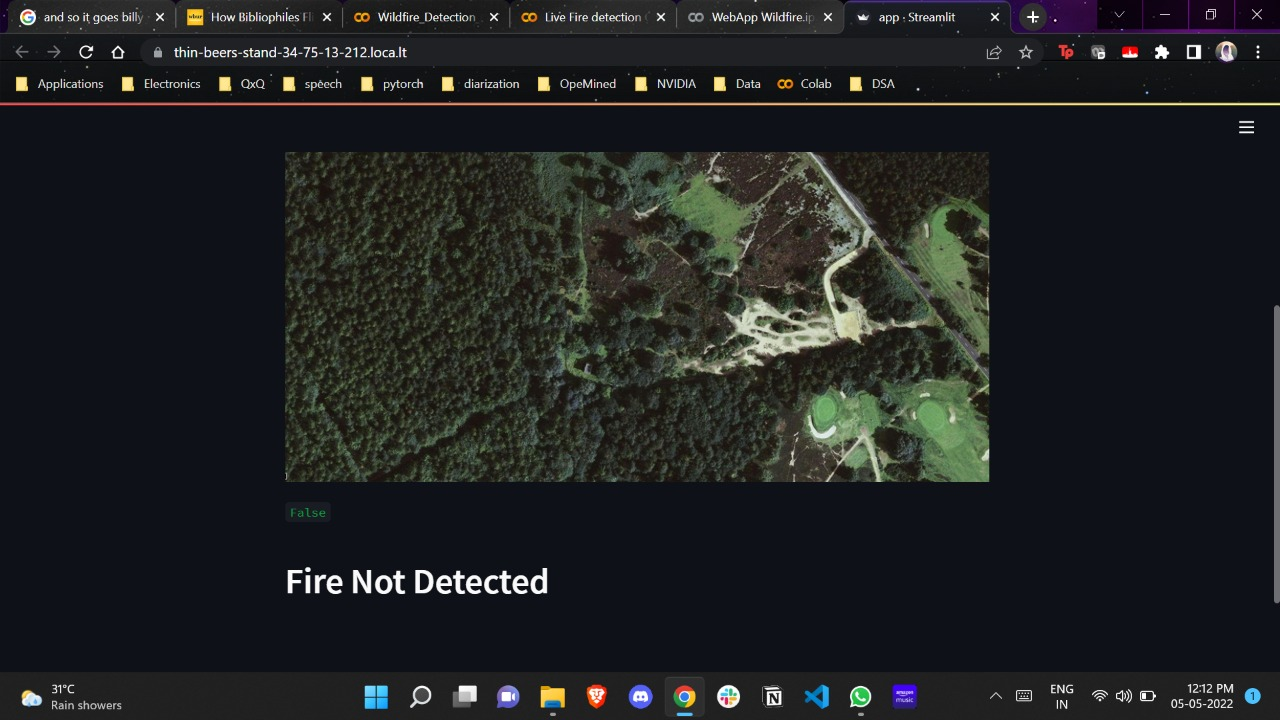

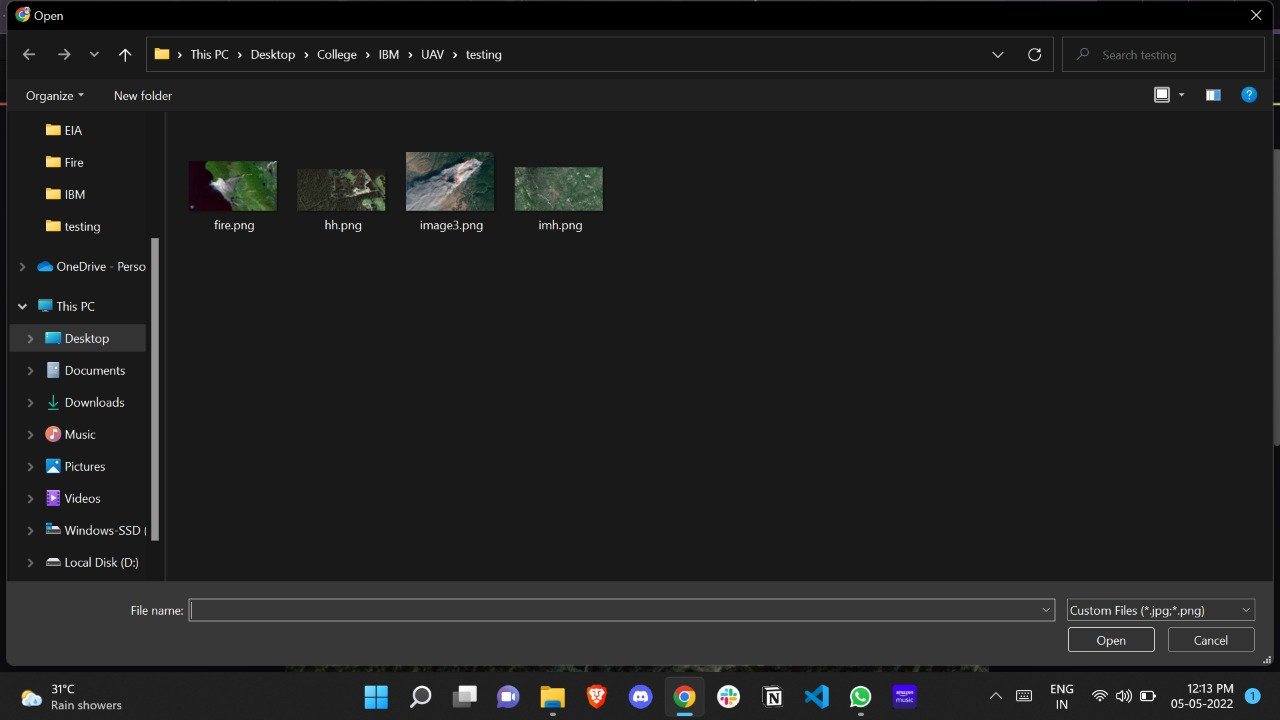